len positions 149002
len linear_x 5275
len angular_z 5275
velocities [-0.03734812083911799, -0.03734812083911799, -0.026158513753521042, -0.01171754479083551, 0.002795714403624657, 0.005208028042415923, 0.005231275554260876, 0.004034834575505045, 0.0023489949857398904, 0.0023958899800619665, 0.0018319559160811455, -0.0006948610498918533, -0.0029856675417887996, 0.003100863223247405, 0.0038541774865219485, 0.0048369831298137695, 0.0012550101628134365, 0.007268556979625782, 0.006151661568395171, 0.004965246791845464, 0.0037295331588508658, 0.003170826571910664, 0.007940551714425242, 0.007619135588296707, 0.008302366695678423, 0.0017079823534794773, 0.002849677134366556, 0.006046673839170064, 0.010538040342403798, 0.0111103629417681, 0.017292213534419888, 0.020584973061029688, 0.01837200688065588, 0.010409880229957555, 0.016712792608004377, 0.022596225346225296, 0.028750021286744323, 0.028229607423788168, 0.03485278967914211, 0.038406149159843334, 0.03817296766682879, 0.04059672145573358,

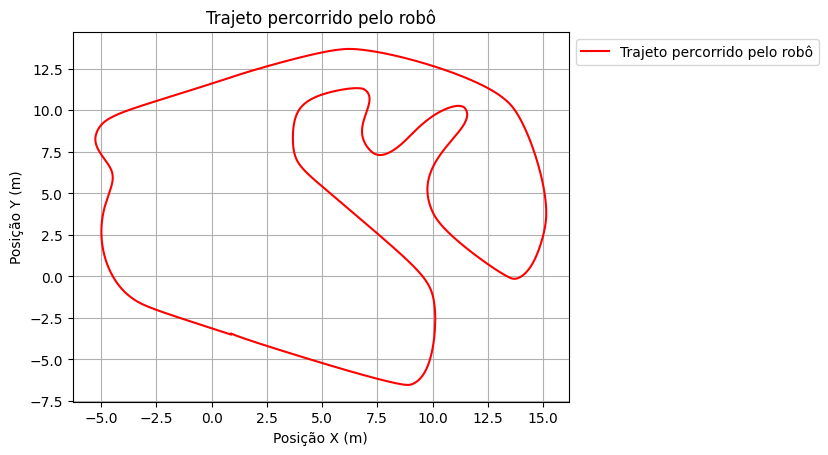

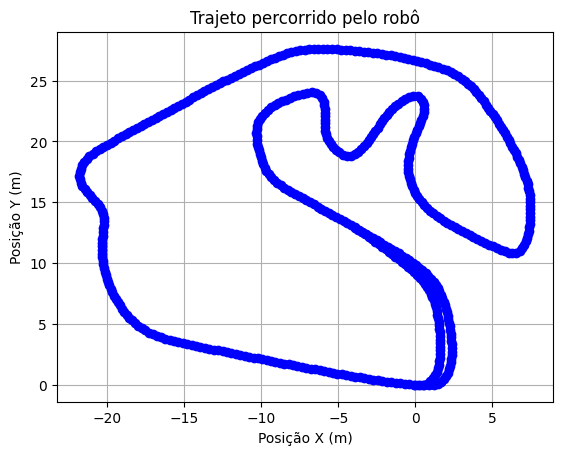

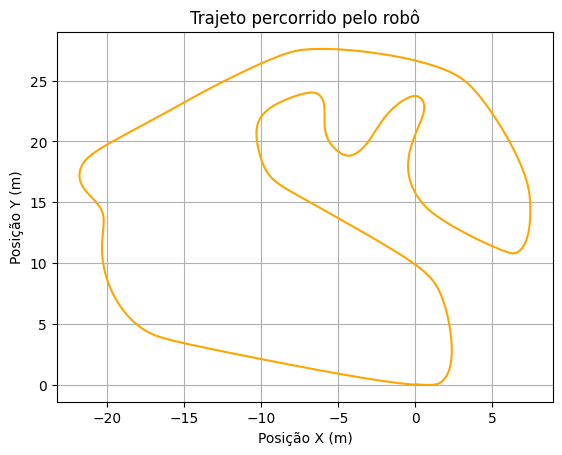

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class DifferentialDriveRobot:
    def __init__(self, R, L):
        self.R = R  # Raio da roda
        self.L = L  # Distância entre as rodas
        
        # Estados iniciais
        self.x = 0
        self.y = 0
        self.theta = 0

    def update(self, v_R, v_L, dt):
        v = (self.R / 2) * (v_R + v_L)
        omega = (self.R / self.L) * (v_R - v_L)
        
        self.x += v * np.cos(self.theta) * dt
        self.y += v * np.sin(self.theta) * dt
        self.theta += omega * dt

    def update_linear(self, v_linear, w_angular, dt):
        v_R = (v_linear + (w_angular * self.L) / 2) / self.R
        v_L = (v_linear - (w_angular * self.L) / 2) / self.R
        v = (self.R / 2) * (v_R + v_L)
        omega = (self.R / self.L) * (v_R - v_L)
        
        self.x += v * np.cos(self.theta) * dt
        self.y += v * np.sin(self.theta) * dt
        self.theta += omega * dt

# Função para extrair as coordenadas de posição (x, y) do arquivo de texto
def load_odometry_data(file_path):
    positions = []
    with open(file_path, 'r') as file:
        for line in file:
            if "position:" in line:  # Localiza as linhas com os dados de pose
                x_line = next(file).strip()
                y_line = next(file).strip()
                if "x:" in x_line and "y:" in y_line:
                    x = float(x_line.split(': ')[1])
                    y = float(y_line.split(': ')[1])
                    positions.append((x, y))
    print('len positions', len(positions))
    return positions

# Função para extrair as coordenadas de posição (x, y) do arquivo de texto
def load_vel_data_data(file_path):
    linear_x = []
    angular_z = []
    with open(file_path, 'r') as file:
        for line in file:
            if "linear:" in line:  # Localiza as linhas com os dados de pose
                x_line = next(file).strip()
                if "x:" in x_line:
                    x = float(x_line.split(': ')[1])
                    linear_x.append(x)
            if "angular:" in line:  # Localiza as linhas com os dados de pose
                next(file)
                next(file)
                y_line = next(file).strip()
                if "z:" in y_line:
                    y = float(y_line.split(': ')[1])
                    angular_z.append(y)
    print('len linear_x', len(linear_x))
    print('len angular_z', len(angular_z))
    out = []
    out.append(linear_x)
    out.append(angular_z)
    return out

# Carrega os dados de odometria do arquivo
positions = load_odometry_data('./records/01/sim_odom.txt')[:88200]
velocities = load_vel_data_data('./records/01/cmd_vel_data_4.txt')
print('velocities', velocities[1])
# linear_x = velocities[0]
# angular_z = velocities[1]
[linear_x, angular_z] = velocities

# Plota o trajeto percorrido pelo robô
x_vals, y_vals = zip(*positions)
plt.figure()
# plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
plt.plot(x_vals, y_vals, '-', label='Trajeto percorrido pelo robô', color='red')
plt.title('Trajeto percorrido pelo robô')
plt.xlabel('Posição X (m)')
plt.ylabel('Posição Y (m)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

dt = 0.5
x_traj = [0]
y_traj = [0]
v_out = []
radius_wheel = 0.05
distance_wheel = 0.10
robot_out = DifferentialDriveRobot(radius_wheel, distance_wheel)


for i in range(len(linear_x)):  # Garantir que o loop seja executado
    robot_out.update_linear(linear_x[i], angular_z[i], dt)
    x_traj.append(robot_out.x)
    y_traj.append(robot_out.y)

plt.figure()
plt.plot(x_traj[::10], y_traj[::10], 'o', color='b')
plt.title('Trajeto percorrido pelo robô')
plt.xlabel('Posição X (m)')
plt.ylabel('Posição Y (m)')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(x_traj[:4750:10], y_traj[:4750:10], '-', color='orange')
plt.title('Trajeto percorrido pelo robô')
plt.xlabel('Posição X (m)')
plt.ylabel('Posição Y (m)')
plt.grid(True)
plt.show()


In [9]:
from datetime import datetime

def load_odometry_data_2(file_path):
    data = []
    entry = {}
    counter = 0
    line_limit = 88200
    with open(file_path, 'r') as file:
        for line in file:
            if "nanosec:" in line:
                entry['timestamp_nsec'] = int(line.split(': ')[1].strip())
            elif "sec:" in line:
                entry['timestamp_sec'] = int(line.split(': ')[1].strip())
            elif "position:" in line:
                entry['position_x'] = float(next(file).split(': ')[1].strip())
                entry['position_y'] = float(next(file).split(': ')[1].strip())
            elif "linear:" in line:
                entry['velocity_linear_x'] = float(next(file).split(': ')[1].strip())
                entry['velocity_linear_y'] = float(next(file).split(': ')[1].strip())
            
            if entry and 'velocity_linear_x' in entry and 'position_x' in entry:
                if counter < line_limit:
                    counter += 1
                else:
                    return data
                # Calcula o timestamp em segundos
                entry['timestamp'] = entry['timestamp_sec'] + entry['timestamp_nsec'] * 1e-9
                data.append(entry)
                entry = {}

    return data

def calculate_statistics(data):
    total_distance = 0
    timestamps = []
    linear_velocities = []

    for i in range(1, len(data)):
        # Cálculo da distância entre dois pontos (distância euclidiana)
        dx = data[i]['position_x'] - data[i-1]['position_x']
        dy = data[i]['position_y'] - data[i-1]['position_y']
        distance = (dx**2 + dy**2)**0.5
        total_distance += distance

        # Armazenar tempos e velocidades
        timestamps.append(data[i]['timestamp'])
        linear_speed = (data[i]['velocity_linear_x']**2 + data[i]['velocity_linear_y']**2)**0.5
        linear_velocities.append(linear_speed)

    # Cálculo do tempo total
    time_elapsed = timestamps[-1] - timestamps[0]

    # Estatísticas de velocidade
    max_velocity = max(linear_velocities)
    min_velocity = min(linear_velocities)
    avg_velocity = sum(linear_velocities) / len(linear_velocities)

    return {
        'Velocidade média (m/s)': avg_velocity,
        'Velocidade máxima (m/s)': max_velocity,
        'Velocidade mínima (m/s)': min_velocity,
        'Distância total percorrida (m)': total_distance,
        'Tempo total gasto (s)': time_elapsed,
        'Tempo total gasto (min)': time_elapsed/60
    }

# Caminho para o arquivo odom.txt
file_path = './records/01/sim_odom.txt'
data = load_odometry_data_2(file_path)
statistics = calculate_statistics(data)

# Exibindo as estatísticas em formato de tabela
print("\nEstatísticas de Odometria:")
for key, value in statistics.items():
    print(f"{key}: {value:.2f}")



Estatísticas de Odometria:
Velocidade média (m/s): 0.06
Velocidade máxima (m/s): 0.06
Velocidade mínima (m/s): 0.00
Distância total percorrida (m): 0.89
Tempo total gasto (s): 15.12
Tempo total gasto (min): 0.25
